In [2]:
from google.colab import drive
drive.mount('./mount')

Mounted at ./mount


In [3]:
import pandas

In [4]:
df = pandas.read_csv('mount/My Drive/Colab Notebooks/myo_gan/mnist_data/mnist_train.csv', header=None)

In [ ]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783,784
0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,147,252,42,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 785 entries, 0 to 784
dtypes: int64(785)
memory usage: 359.3 MB


In [5]:
import matplotlib.pyplot as plt

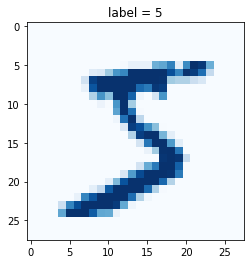

In [6]:
row = 0
data = df.iloc[row]

#첫번째 값은 레이블
label = data[0]

#이미지 데이터는 나머지 784개의 값
img = data[1:].values.reshape(28, 28)
plt.title("label = " + str(label))
plt.imshow(img, interpolation='none', cmap = 'Blues')
plt.show()

In [7]:
import torch
import torch.nn as nn

In [8]:
#Veiw함수
class View(nn.Module):
  def __init__(self, shape):
    super().__init__()
    self.shape = shape,

  def forward(self, x):
    return x.view(*self.shape)

In [18]:
class Classifier(nn.Module):
  def __init__(self):
    super().__init__()

    self.model = nn.Sequential(
        #1개의 필터에서 10개의 필터로
        nn.Conv2d(1, 10, kernel_size = 5, stride = 2), 
        nn.LeakyReLU(0.02),
        nn.BatchNorm2d(10),

        #10개의 필터에서 10개의 필터로
        nn.Conv2d(10, 10, kernel_size=3, stride = 2),
        nn.LeakyReLU(0.02),
        nn.BatchNorm2d(10),

        View(250),
        nn.Linear(250,10), 
        nn.Sigmoid()
    )

    self.loss_function = nn.BCELoss()

    self.optimiser = torch.optim.Adam(self.parameters())

    self.counter = 0
    self.progress = []

    pass
  
  def forward(self, inputs):
    return self.model(inputs)

  def train(self, inputs, targets):
    outputs = self.forward(inputs)

    loss = self.loss_function(outputs, targets)

    #각 노드마다 오차기울기를 계산하고, 노드에 연결된 가중치 수정
    self.optimiser.zero_grad()#기울기 초기화
    loss.backward()#역전파 실행
    self.optimiser.step()#가중치 갱신

    self.counter += 1
    if(self.counter%10 == 0):
      self.progress.append(loss.item())
      pass

    if(self.counter %10000 == 0):
      print("counter = ", self.counter)
      pass

  def plot_progress(self):
    df = pandas.DataFrame(self.progress, columns = ['loss'])#차트로 쉽게 나타내기 위해 손실값을 저장해둔 리스트를 팬더스 데이터프레임으로 변환
    df.plot(ylim = (0, 1.0), figsize = (16, 8), alpha = 0.1, marker='.', grid = True, yticks = (0, 0.25, 0.5))#plot함수의 옵션으로 여러 스타일과 디자인 지정
    pass

In [10]:
from torch.utils.data import Dataset

In [11]:
class MnistDataset(Dataset):
  def __init__(self, csv_file):
    self.data_df = pandas.read_csv(csv_file, header = None)
    pass

  def __len__(self):
    return len(self.data_df)

  def __getitem__(self, index):
    label = self.data_df.iloc[index, 0]
    target = torch.zeros((10))
    target[label] = 1.0

    image_values = torch.FloatTensor(self.data_df.iloc[index, 1:].values) / 255.0 #각 픽셀을 255로 나눔 -> 정규화, 0~1사이의 값을 갖는다
    
    return label, image_values, target

  def plot_image(self, index):
    img = self.data_df.iloc[index,1:].values.reshape(28, 28)
    plt.title("label = " + str(self.data_df.iloc[index, 0]))
    plt.imshow(img, interpolation = 'none', cmap = "Blues")
    #plt.show()
    pass

  pass

In [12]:
mnist_dataset = MnistDataset('mount/My Drive/Colab Notebooks/myo_gan/mnist_data/mnist_train.csv')

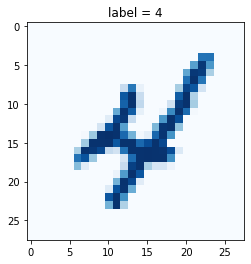

In [13]:
mnist_dataset.plot_image(9)

In [ ]:
mnist_dataset[100]

(5,
 tensor([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0

In [14]:
C = Classifier()

In [ ]:
#for label, image_data_tensor, target_tensor in mnist_dataset:
#  C.train(image_data_tensor, target_tensor)
#  pass

In [ ]:
"""
for i in range(epochs):
    print('training epoch', i+1, "of", epochs)
    for label, image_data_tensor, target_tensor in mnist_dataset:
        C.train(image_data_tensor.view(1, 1, 28, 28), target_tensor)
        pass
    pass
    """

In [20]:
%%time
C = Classifier()

epochs = 3

for i in range(epochs):
    print('training epoch', i+1, "of", epochs)
    for label, image_data_tensor, target_tensor in mnist_dataset:
        C.train(image_data_tensor.view(1, 1, 28, 28), target_tensor)
        pass
    pass

"""
for i in range(epochs):
  print("training epoch =", i+1, "of", epochs)
  for label, image_data_tensor, target_tensor in mnist_dataset:
    C.train(image_data_tensor, target_tensor)
    pass
  pass
  """

training epoch 1 of 3
counter =  10000
counter =  20000
counter =  30000
counter =  40000
counter =  50000
counter =  60000
training epoch 2 of 3
counter =  70000
counter =  80000
counter =  90000
counter =  100000
counter =  110000
counter =  120000
training epoch 3 of 3
counter =  130000
counter =  140000
counter =  150000
counter =  160000
counter =  170000
counter =  180000
CPU times: user 6min 40s, sys: 2.25 s, total: 6min 42s
Wall time: 6min 43s


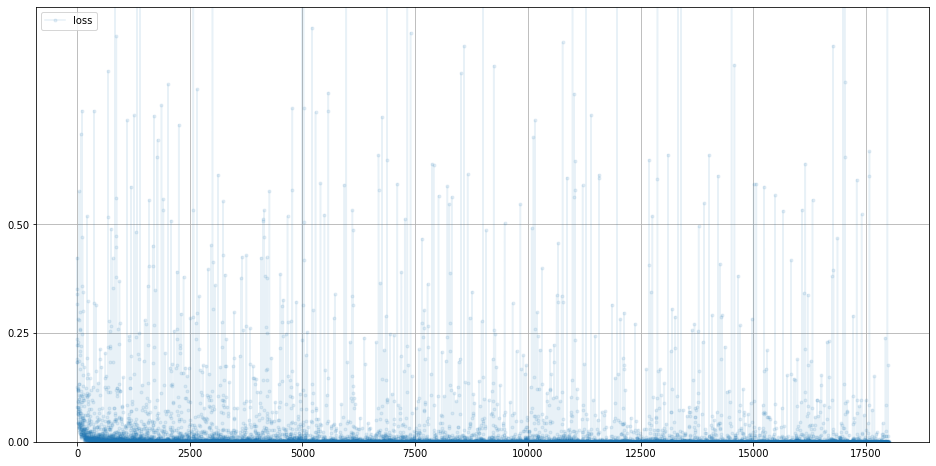

In [ ]:
#C.plot_progress()#기존

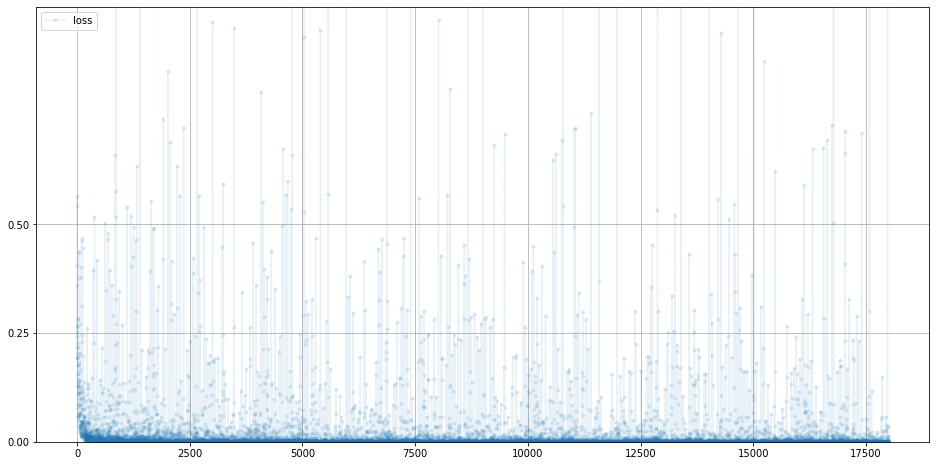

In [21]:
C.plot_progress()

In [22]:
mnist_test_dataset = MnistDataset('mount/My Drive/Colab Notebooks/myo_gan/mnist_data/mnist_test.csv')

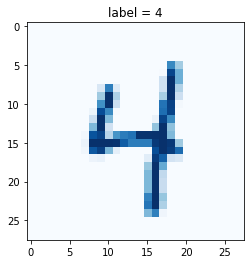

In [23]:
record = 19

mnist_test_dataset.plot_image(record)

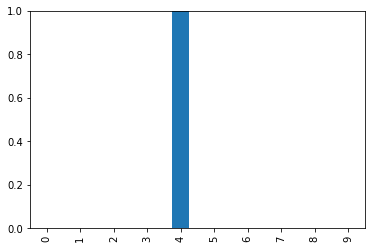

In [ ]:
#기존
image_data = mnist_test_dataset[record][1]

output = C.forward(image_data)

pandas.DataFrame(output.detach().numpy()).plot(kind = 'bar', legend = False, ylim=(0, 1))

In [ ]:
#기존  : 9725   10000  0.9725
score = 0
items = 0

for label, image_data_tensor, target_tensor in mnist_test_dataset:
  answer = C.forward(image_data_tensor).detach().numpy()
  if(answer.argmax() == label):
    score += 1
    pass
  items += 1

  pass

print(score, items, score/items)

9725 10000 0.9725


In [ ]:
"""
# visualise the answer given by the neural network

image_data = mnist_test_dataset[record][1]

# query from trained network
output = C.forward(image_data.view(1,1,28,28))

# plot output tensor
pandas.DataFrame(output.detach().numpy()).plot(kind='bar', legend=False, ylim=(0,1))
"""

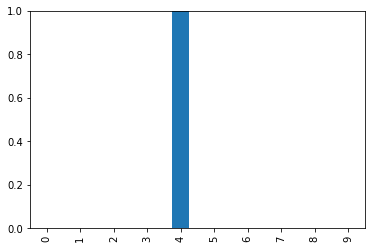

In [26]:
image_data = mnist_test_dataset[record][1]

output = C.forward(image_data.view(1, 1, 28, 28))

pandas.DataFrame(output.detach().numpy()).plot(kind = 'bar', legend = False, ylim=(0, 1))

In [ ]:
'''
score = 0
items = 0

for label, image_data_tensor, target_tensor in mnist_test_dataset:
    answer = C.forward(image_data_tensor.view(1,1,28,28)).detach().numpy()
    if (answer.argmax() == label):
        score += 1
        pass
    items += 1
    
    pass

print(score, items, score/items)
'''

In [28]:
score = 0
items = 0

for label, image_data_tensor, target_tensor in mnist_test_dataset:
  answer = C.forward(image_data_tensor.view(1, 1, 28, 28)).detach().numpy()
  if(answer.argmax() == label):
    score += 1
    pass
  items += 1

  pass

print(score, items, score/items)

9792 10000 0.9792
